In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv("housing.csv")

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
def show_elbow_plot(data, min_clusters=2, max_clusters=10):
    k_values = np.arange(min_clusters, max_clusters + 1)
    sse_values = np.zeros(k_values.shape)
    cluster_count = min_clusters
    print(k_values)
    for i in range(0, max_clusters - min_clusters + 1):  
        print(i)
        means = KMeans(n_clusters = cluster_count)
        cluster_count += 1
        means.fit(data)
        sse_values[i] = means.inertia_
        print(means.inertia_)
        
    sns.lineplot(x=k_values, y=sse_values)

In [195]:
lat_df = df[["longitude", "latitude"]]
scaler = StandardScaler()

show_elbow_plot(scaler.fit_transform(lat_df))

KeyError: "None of [Index(['longitude', 'latitude'], dtype='object')] are in the [columns]"

<Axes: xlabel='longitude', ylabel='latitude'>

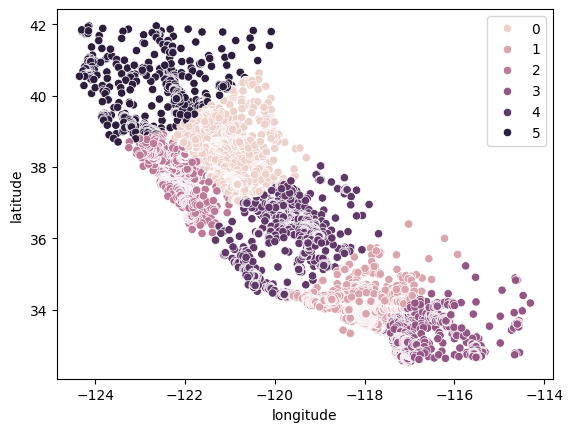

In [117]:
lat_df = df[["longitude", "latitude"]]
means = KMeans(n_clusters=6)
means.fit(lat_df)
sns.scatterplot(df, x="longitude", y="latitude", hue=means.labels_)

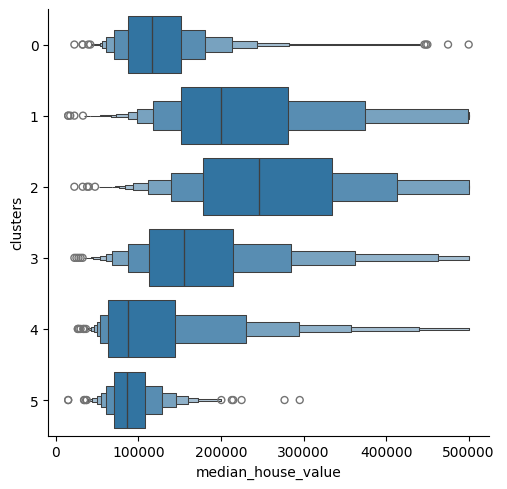

In [118]:
clusters = pd.Series(means.labels_)
df["clusters"] = clusters
df["clusters"] = df["clusters"].astype("category")
sns.catplot(df, x="median_house_value", y="clusters", kind="boxen")

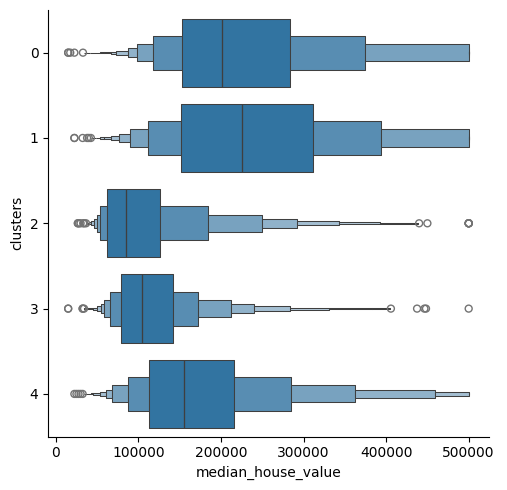

In [183]:
cluster1 = np.random.random((2, 100))
cluster2 = np.random.random((2, 100)) + 3
data = np.append(cluster1, cluster2, axis=1)
df = pd.DataFrame()

In [185]:
df["a"] = pd.Series(data[0])
df["b"] = pd.Series(data[1])

<Axes: xlabel='a', ylabel='b'>

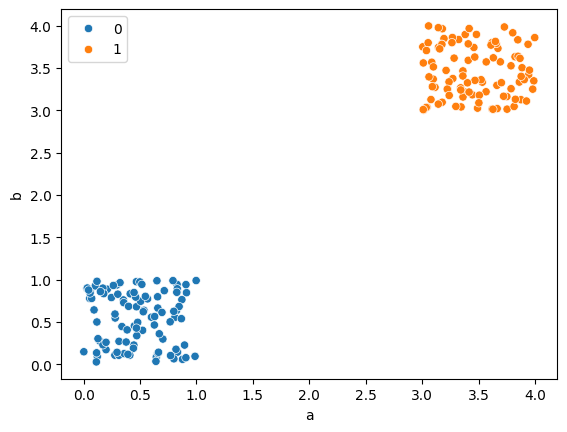

In [213]:
means = KMeans(n_clusters=2)
clusters = means.fit_predict(df)
sns.scatterplot(df, x='a', y='b', hue=clusters)

[ 1  2  3  4  5  6  7  8  9 10]
0
1
2
3
4
5
6
7
8
9


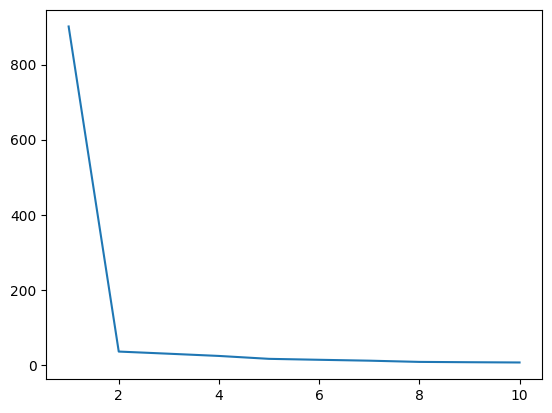

In [215]:
show_elbow_plot(df, min_clusters=1)

In [13]:
df = pd.read_csv("arrests.csv").drop("Unnamed: 0", axis=1)

[ 2  3  4  5  6  7  8  9 10]
0
102.86240049441723
1
78.82056331877126
2
57.076752644716294
3
48.99396595700208
4
42.87162446032444
5
42.765194335960544
6
35.06193470284875
7
31.400842219372922
8
30.454897443802682


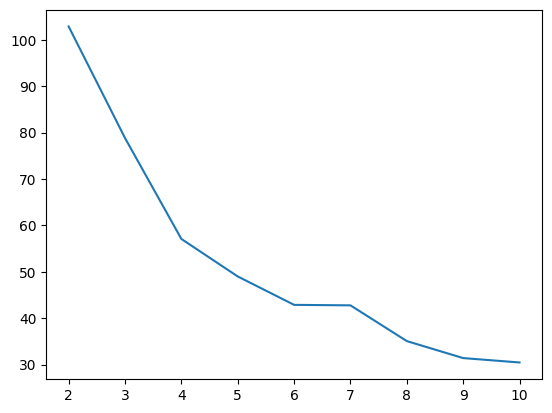

In [17]:
show_elbow_plot(df)